In [1]:
#Course: Data Science Masters
#Title: Project 3
#Tool: Jupyter notebook 
#Author: Krishna A
#Date: 26-07-2018 (DD/MM/YYYY)

# PROJECT ON APPICATION OF CLASSIFICATION MODELS

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer
from sklearn.naive_bayes import GaussianNB

In [2]:
import numpy as np
import xgboost as xgb

In [3]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [4]:
from sklearn.model_selection import train_test_split

In [68]:
adult_df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep='\s+', header=None)
adult_df.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race',
                    'sex', 'capital-gain','capital-loss','hours-per-week','native-country','income']

In [69]:
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50K


In [7]:
data_ = pd.get_dummies(data = adult_df, columns=['workclass', 'education',  'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
data_.head()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,income,"workclass_?,","workclass_Federal-gov,","workclass_Local-gov,",...,"native-country_Portugal,","native-country_Puerto-Rico,","native-country_Scotland,","native-country_South,","native-country_Taiwan,","native-country_Thailand,","native-country_Trinadad&Tobago,","native-country_United-States,","native-country_Vietnam,","native-country_Yugoslavia,"
0,"39,","77516,","13,","2174,","0,","40,",<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,"50,","83311,","13,","0,","0,","13,",<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"38,","215646,","9,","0,","0,","40,",<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,"53,","234721,","7,","0,","0,","40,",<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,"28,","338409,","13,","0,","0,","40,",<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data_['fnlwgt'].unique()

array(['77516,', '83311,', '215646,', ..., '34066,', '84661,', '257302,'], dtype=object)

In [9]:
data_.columns.tolist()

['age',
 'fnlwgt',
 'education_num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income',
 'workclass_?,',
 'workclass_Federal-gov,',
 'workclass_Local-gov,',
 'workclass_Never-worked,',
 'workclass_Private,',
 'workclass_Self-emp-inc,',
 'workclass_Self-emp-not-inc,',
 'workclass_State-gov,',
 'workclass_Without-pay,',
 'education_10th,',
 'education_11th,',
 'education_12th,',
 'education_1st-4th,',
 'education_5th-6th,',
 'education_7th-8th,',
 'education_9th,',
 'education_Assoc-acdm,',
 'education_Assoc-voc,',
 'education_Bachelors,',
 'education_Doctorate,',
 'education_HS-grad,',
 'education_Masters,',
 'education_Preschool,',
 'education_Prof-school,',
 'education_Some-college,',
 'marital_status_Divorced,',
 'marital_status_Married-AF-spouse,',
 'marital_status_Married-civ-spouse,',
 'marital_status_Married-spouse-absent,',
 'marital_status_Never-married,',
 'marital_status_Separated,',
 'marital_status_Widowed,',
 'occupation_?,',
 'occupation_Adm-clerical,',
 'occ

In [10]:
data_['capital-gain'] = pd.to_numeric(data_['capital-gain'].str.replace(',',''))
data_['capital-loss'] = pd.to_numeric(data_['capital-loss'].str.replace(',',''))
data_['hours-per-week'] = pd.to_numeric(data_['hours-per-week'].str.replace(',',''))
data_['education_num'] = pd.to_numeric(data_['education_num'].str.replace(',',''))
data_['fnlwgt'] = pd.to_numeric(data_['fnlwgt'].str.replace(',',''))
data_['age'] = pd.to_numeric(data_['age'].str.replace(',',''))


In [11]:
data_['income'].replace({'>50K':'1', '<=50K':'0'}, inplace=True)
data_['income'] = pd.to_numeric(data_['income'].str.replace(',',''))

In [12]:
data_.head()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,income,"workclass_?,","workclass_Federal-gov,","workclass_Local-gov,",...,"native-country_Portugal,","native-country_Puerto-Rico,","native-country_Scotland,","native-country_South,","native-country_Taiwan,","native-country_Thailand,","native-country_Trinadad&Tobago,","native-country_United-States,","native-country_Vietnam,","native-country_Yugoslavia,"
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Problem 1:
Prediction task is to determine whether a person makes over 50K a year.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
X = data_[['age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_?,', 'workclass_Federal-gov,', 'workclass_Local-gov,','workclass_Never-worked,', 'workclass_Private,', 'workclass_Self-emp-inc,', 'workclass_Self-emp-not-inc,', 'workclass_State-gov,', 'workclass_Without-pay,', 'education_10th,', 'education_11th,', 'education_12th,', 'education_1st-4th,', 'education_5th-6th,', 'education_7th-8th,', 'education_9th,', 'education_Assoc-acdm,', 'education_Assoc-voc,', 'education_Bachelors,', 'education_Doctorate,', 'education_HS-grad,', 'education_Masters,', 'education_Preschool,', 'education_Prof-school,', 'education_Some-college,', 'marital_status_Divorced,', 'marital_status_Married-AF-spouse,', 'marital_status_Married-civ-spouse,', 'marital_status_Married-spouse-absent,', 'marital_status_Never-married,', 'marital_status_Separated,', 'marital_status_Widowed,', 'occupation_?,', 'occupation_Adm-clerical,', 'occupation_Armed-Forces,', 'occupation_Craft-repair,', 'occupation_Exec-managerial,', 'occupation_Farming-fishing,', 'occupation_Handlers-cleaners,', 'occupation_Machine-op-inspct,', 'occupation_Other-service,', 'occupation_Priv-house-serv,', 'occupation_Prof-specialty,', 'occupation_Protective-serv,', 'occupation_Sales,', 'occupation_Tech-support,', 'occupation_Transport-moving,', 'relationship_Husband,', 'relationship_Not-in-family,', 'relationship_Other-relative,', 'relationship_Own-child,', 'relationship_Unmarried,', 'relationship_Wife,', 'race_Amer-Indian-Eskimo,', 'race_Asian-Pac-Islander,', 'race_Black,', 'race_Other,', 'race_White,', 'sex_Female,', 'sex_Male,', 'native-country_?,', 'native-country_Cambodia,', 'native-country_Canada,', 'native-country_China,', 'native-country_Columbia,', 'native-country_Cuba,', 'native-country_Dominican-Republic,', 'native-country_Ecuador,', 'native-country_El-Salvador,', 'native-country_England,', 'native-country_France,', 'native-country_Germany,', 'native-country_Greece,', 'native-country_Guatemala,', 'native-country_Haiti,', 'native-country_Holand-Netherlands,', 'native-country_Honduras,', 'native-country_Hong,', 'native-country_Hungary,', 'native-country_India,', 'native-country_Iran,', 'native-country_Ireland,', 'native-country_Italy,', 'native-country_Jamaica,', 'native-country_Japan,', 'native-country_Laos,', 'native-country_Mexico,', 'native-country_Nicaragua,', 'native-country_Outlying-US(Guam-USVI-etc),', 'native-country_Peru,', 'native-country_Philippines,', 'native-country_Poland,', 'native-country_Portugal,', 'native-country_Puerto-Rico,', 'native-country_Scotland,', 'native-country_South,', 'native-country_Taiwan,', 'native-country_Thailand,', 'native-country_Trinadad&Tobago,', 'native-country_United-States,', 'native-country_Vietnam,', 'native-country_Yugoslavia,']]
Y = data_['income']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state =12312)

In [14]:
m1 = DecisionTreeClassifier()
m1.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [15]:
train_DT_pred = m1.predict(X_train)
test_DT_pred = m1.predict(X_test)

In [16]:
print(accuracy_score(Y_train, train_DT_pred))
print(accuracy_score(Y_test, test_DT_pred))

1.0
0.81666496059


In [17]:
m2 = GaussianNB()
m2.fit(X_train,Y_train)
train_NB_pred = m2.predict(X_train)
test_NB_pred = m2.predict(X_test)

In [18]:
print(accuracy_score(Y_train, train_NB_pred))
print(accuracy_score(Y_test, test_NB_pred))

0.794357669358
0.79793223462


In [19]:
m3 = LogisticRegression()
m3.fit(X_train,Y_train)
train_LR_pred = m3.predict(X_train)
test_LR_pred = m3.predict(X_test)

In [20]:
print(accuracy_score(Y_train, train_LR_pred))
print(accuracy_score(Y_test, test_LR_pred))

0.795981045981
0.799877162453


In [21]:
m4 = XGBClassifier(n_estimators=5000)
m4.fit(X_train,Y_train)
train_GB_pred = m4.predict(X_train)
test_GB_pred = m4.predict(X_test)

In [22]:
print(accuracy_score(Y_train, train_GB_pred))
print(accuracy_score(Y_test, test_GB_pred))

0.934011934012
0.866721261132


In [23]:
data_.shape

(32561, 109)

In [24]:
m5 = KNeighborsClassifier(n_neighbors=5)
m5.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
train_KN_pred = m5.predict(X_train)
test_KN_pred = m5.predict(X_test)

In [26]:
print(accuracy_score(Y_train, train_KN_pred))
print(accuracy_score(Y_test, test_KN_pred))

0.831168831169
0.777049851571


In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
m6 = RandomForestClassifier(n_estimators=70,oob_score=True,random_state=45)
m6.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=70, n_jobs=1, oob_score=True, random_state=45,
            verbose=0, warm_start=False)

In [29]:
train_RF_pred = m6.predict(X_train)
test_RF_pred = m6.predict(X_test)

In [30]:
print(accuracy_score(Y_train, train_RF_pred))
print(accuracy_score(Y_test, test_RF_pred))

0.999605124605
0.856280069608


In [31]:
Ensemble_M_train = pd.DataFrame({'DT':list(train_DT_pred),'NB':list(train_NB_pred),'LR':list(train_LR_pred), 'GB': list(train_GB_pred), 'KN': list(train_KN_pred), 'RF': list(train_RF_pred), 'Y': list(Y_train)})
Ensemble_M_test = pd.DataFrame({'DT':list(test_DT_pred),'NB':list(test_NB_pred),'LR':list(test_LR_pred), 'GB': list(test_GB_pred), 'KN': list(test_KN_pred), 'RF': list(test_RF_pred), 'Y': list(Y_test)})

In [32]:
Ensemble_M_train.head()

,DT,GB,KN,LR,NB,RF,Y
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [33]:
Ensemble_M_test.head()

,DT,GB,KN,LR,NB,RF,Y
0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,1,1,0,1,1,1,1
4,0,0,0,0,0,0,0


In [34]:
pd.crosstab(Ensemble_M_test.LR, Ensemble_M_test.Y)

Y,0,1
LR,,
0,7211,1698
1,257,603


In [35]:
X_train_Ens = Ensemble_M_train[['DT','NB','LR','GB','KN','RF']]
Y_train_Ens = Ensemble_M_train[['Y']]

In [36]:
X_test_Ens = Ensemble_M_test[['DT','NB','LR','GB','KN','RF']]
Y_test_Ens = Ensemble_M_test[['Y']]

In [37]:
# Train prediction model are trained using Logistic Regression prediction
model_ensemble = LogisticRegression()


In [38]:
model_ensemble.fit(X_train_Ens, Y_train_Ens)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
# Predicting outcome based on test prediction on the model build on test prediction
test_pred_Ens = model_ensemble.predict(X_test_Ens)

In [40]:
print(classification_report(Y_test_Ens, test_pred_Ens))

             precision    recall  f1-score   support

          0       0.89      0.87      0.88      7468
          1       0.60      0.64      0.62      2301

avg / total       0.82      0.82      0.82      9769



In [41]:
print(accuracy_score(Y_test_Ens, test_pred_Ens))

0.81666496059


In [42]:
print(confusion_matrix(Y_test_Ens, test_pred_Ens))

[[6497  971]
 [ 820 1481]]


In [43]:
 tn, fp, fn, tp = confusion_matrix(Y_test_Ens, test_pred_Ens).ravel()

In [44]:
tn, fp, fn, tp

(6497, 971, 820, 1481)

We have 1489 True positives, 6539 True Negatives, 929 False Positive, 812 False Negatives

#### Problem 2:
Which factors are important?

In [45]:
import matplotlib.pyplot as plt


# this allows plots to appear directly in the notebook
%matplotlib inline

In [46]:

adult_df['education_num'] = pd.to_numeric(adult_df['education_num'].str.replace(',',''))

In [47]:
import ggplot
from ggplot import *


C:\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [48]:
adult_df['age'] = pd.to_numeric(adult_df['age'].str.replace(',',''))


In [49]:
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,"State-gov,","77516,","Bachelors,",13,"Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
1,50,"Self-emp-not-inc,","83311,","Bachelors,",13,"Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
2,38,"Private,","215646,","HS-grad,",9,"Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
3,53,"Private,","234721,","11th,",7,"Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K
4,28,"Private,","338409,","Bachelors,",13,"Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50K


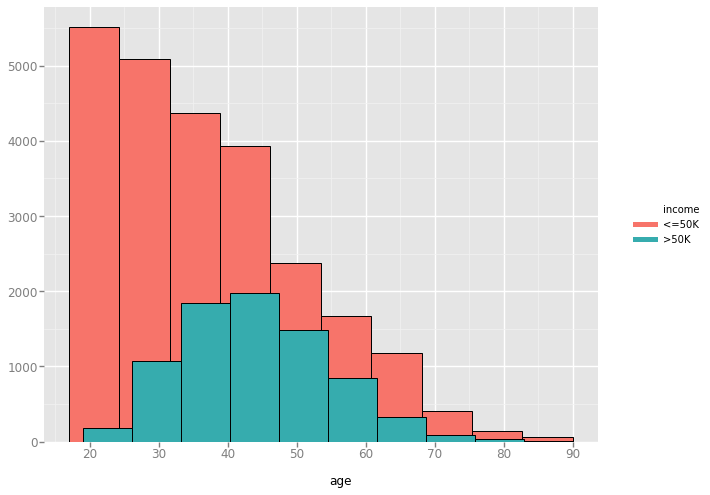

<ggplot: (-9223371854561392559)>

In [50]:
ggplot(aes(x='age', fill='income'), data=adult_df) + \
    geom_histogram(color='black')

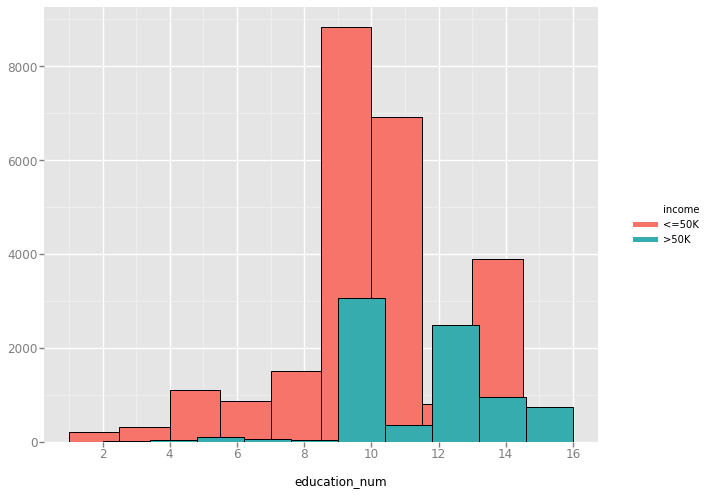

<ggplot: (182288345962)>

In [51]:
ggplot(aes(x='education_num', fill='income'), adult_df) + geom_histogram(color='black')

In [52]:
adult_df.occupation.unique()

array(['Adm-clerical,', 'Exec-managerial,', 'Handlers-cleaners,',
       'Prof-specialty,', 'Other-service,', 'Sales,', 'Craft-repair,',
       'Transport-moving,', 'Farming-fishing,', 'Machine-op-inspct,',
       'Tech-support,', '?,', 'Protective-serv,', 'Armed-Forces,',
       'Priv-house-serv,'], dtype=object)

In [53]:
adult_df.occupation.replace({'Adm-clerical':'AC', 'Exec-managerial':'EM', 'Handlers-cleaners':'HC',
       'Prof-specialty':'PS', 'Other-service':'OS', 'Sales':'S', 'Craft-repair':'CR',
       'Transport-moving':'TM', 'Farming-fishing':'FF', 'Machine-op-inspct':'MOI',
       'Tech-support':'TS', '?':'?', 'Protective-serv':'PSE', 'Armed-Forces':'AF',
       'Priv-house-serv':'PHS'}, inplace= True)

In [54]:
adult_df.income = adult_df.income.apply(lambda x:1 if x == '>50K' else 0)
adult_df.income.unique()

array([0, 1], dtype=int64)

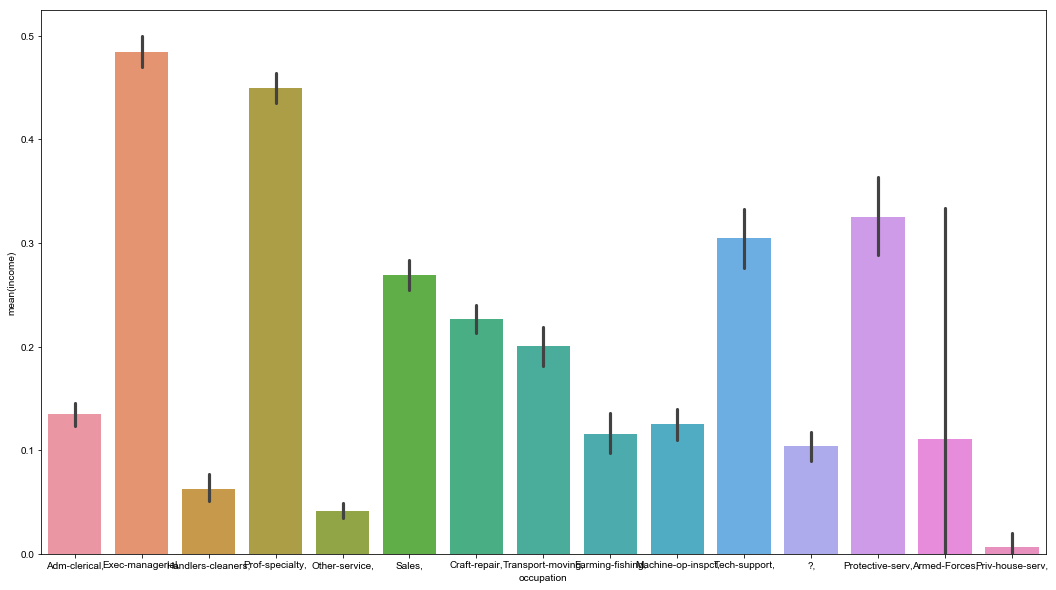

In [55]:
#ggplot(aes(x='occupation', fill='income'), adult_df) +  geom_histogram(color='black') 
fig, axs = plt.subplots(figsize=(18, 10), sharey=True)
#axs[0].bar(adult_df.occupation, adult_df.income)

import seaborn as sns
#sns.set(style="whitegrid", color_codes=True)
sns.barplot(x="occupation", y="income", data=adult_df);


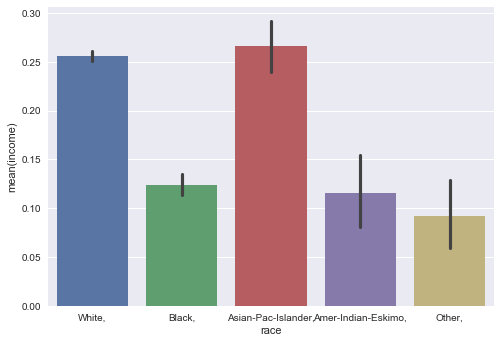

In [56]:
sns.barplot(x="race", y="income", data=adult_df);

In [71]:
for i in range(len(adult_df['hours-per-week'])):
    adult_df['hours-per-week'][i] = adult_df['hours-per-week'][i][:len(adult_df['hours-per-week'][i])-1]
   

In [72]:
adult_df['hours-per-week'] = pd.to_numeric(adult_df['hours-per-week'], errors='coerce')

In [73]:
type(adult_df['hours-per-week'][0])

numpy.int64

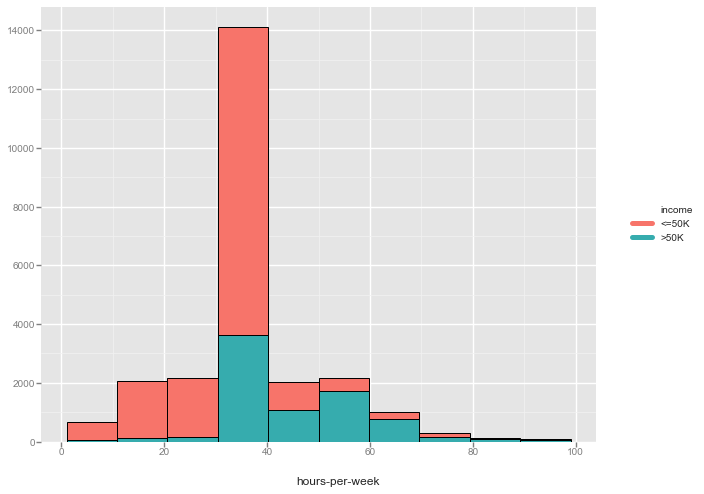

<ggplot: (182294037091)>

In [74]:
ggplot(aes(x='hours-per-week', fill='income'), adult_df) + geom_histogram(color='black')

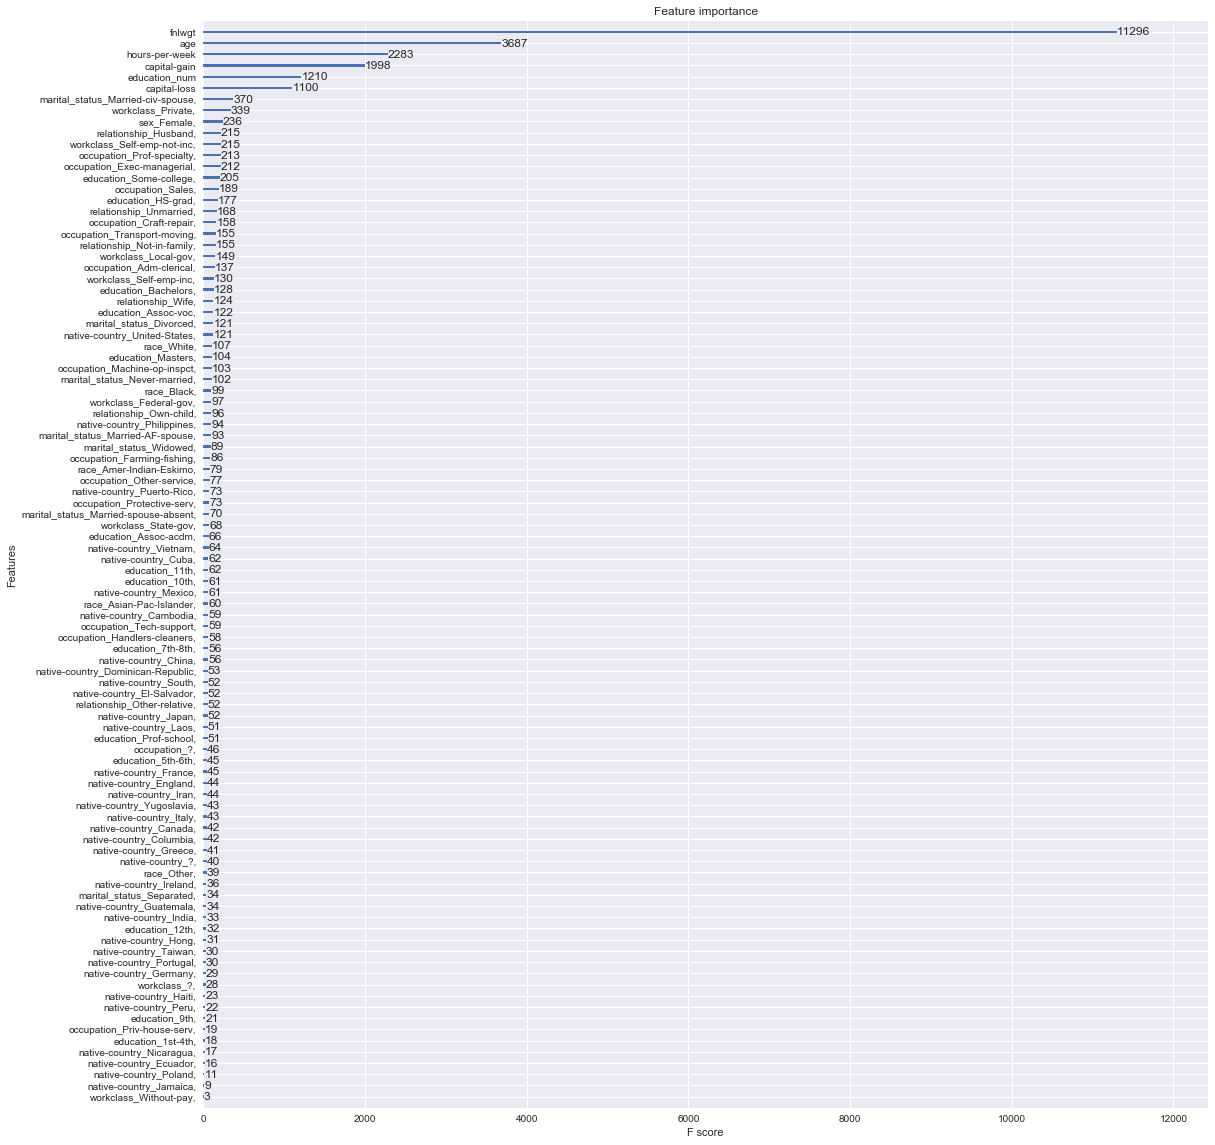

In [75]:
fig, ax = plt.subplots(1,1,figsize=(18,20))
m4.feature_importances_
xgb.plot_importance(m4, ax=ax, max_num_features=106)

As per the above graphs,
The important factors which are impacting the income of the employees are
1. fnlwgt - Final Weight
2. age
3. Hours-per-week

#### Problem 3:
Which algorithms are best for this dataset ?

The best algorithms are GaussianNB and Logistic Regression since the
train accuracy are almost the same as test accuracy, whereas in other algorithms
we have overfitting as train accuracy is more than test accuracy.
